In [93]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

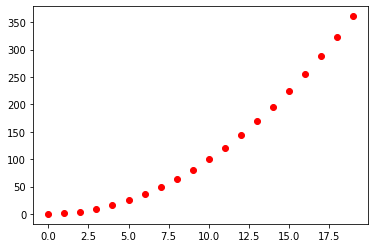

In [94]:
x = np.arange(0, 20, 1)
y = 1 + x**2
outputs = x**2
plt.scatter(x, outputs, c='r')

In [95]:
class GradientDescent():

    def __init__(self, X, y, lr=0.015):
        self.lr = lr
        self.X = X
        self.y = y
        self.m = X.shape[0]

    # Model representation
    def f(self, x, w, b):
        return w * x + b

    # Compute output prediction for each input sample, given some choice for w & b

    def compute_model_output(self, w, b):
        f_wb = np.zeros(self.m)

        for i in range(self.m):
            f_wb[i] = self.f(self.X[i], w, b)

        return f_wb


    def compute_cost(self, w, b):
        cost = self.compute_model_output(w, b) - self.y
        cost_sum = np.sum(cost**2)
        return (1 / (2 * self.m)) * cost_sum


    def cost_derivative_w(self, w, b):
        cost = self.compute_model_output(w, b) - self.y
        dj_dw = 0
        for i in range(self.X.shape[0]):
            dj_dw += cost[i] * self.X[i]
        dj_dw = dj_dw * (1 / self.m)
        return dj_dw


    def cost_derivative_b(self, w, b):
        cost = self.compute_model_output(w, b) - self.y
        dj_db = np.sum(cost)
        dj_db = dj_db * (1 / self.m)
        return dj_db


    def update_weights(self, w, b):
        tmp_w = w - self.lr * self.cost_derivative_w(w, b)
        tmp_b = b - self.lr * self.cost_derivative_b(w, b)
        w = tmp_w
        b = tmp_b

        return w, b


    def run(self, w, b, iter):
        cost = self.compute_cost(w, b)

        for i in range(iter):
            print(f'Current cost = {cost}')
            w, b = self.update_weights(w, b)
            cost = self.compute_cost(w, b)
            
        print(f'\nFinal cost = {cost}')
        return w, b

In [96]:
gd = GradientDescent(x, outputs)
w, b = gd.run(1, 50, 80)

Current cost = 7873.400000000001
Current cost = 6367.1657609375
Current cost = 5241.0215693053005
Current cost = 4398.299880120761
Current cost = 3766.9245026815315
Current cost = 3293.1547323308587
Current cost = 2936.920931662544
Current cost = 2668.346707475542
Current cost = 2465.155821756708
Current cost = 2310.738766496553
Current cost = 2192.711188438251
Current cost = 2101.839040551238
Current cost = 2031.237167496496
Current cost = 1975.7717653742347
Current cost = 1931.6148515518698
Current cost = 1895.912074263184
Current cost = 1866.5350291277364
Current cost = 1841.8965846167453
Current cost = 1820.813187426937
Current cost = 1802.402196399984
Current cost = 1786.0053339687995
Current cost = 1771.13161101323
Current cost = 1757.4147712250833
Current cost = 1744.5815613201821
Current cost = 1732.428073077206
Current cost = 1720.8021037867084
Current cost = 1709.5900040686215
Current cost = 1698.7068715029463
Current cost = 1688.0892389220612
Current cost = 1677.689622740145

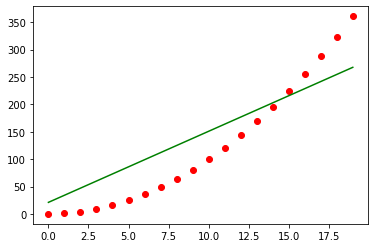

In [97]:
plt.scatter(x, outputs, c='r', label='Non-linear data')
plt.plot(x, (x * w + b), c='g', label='Estimated Line')
plt.show()